In [3]:
import numpy as np 
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import gdown

In [108]:
file_path = "test.zip"
output = file_path

gdown.download("https://drive.google.com/uc?id=1JPgasvr1db3boCrnuSDRzXCXbbhptQ0h", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1o1aX8fPCUFL8r6B-jsQtsbIUyuLc8Cge", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1agaBydG4SR_HiUisGQBv7k8PkmUTHW61", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

Downloading...
From: https://drive.google.com/uc?id=1JPgasvr1db3boCrnuSDRzXCXbbhptQ0h
To: C:\Users\Nicho\OneDrive\Desktop\UNI\MAGISTRALE\Visione Artificiale\FER-and-GR-Project\test.zip
100%|██████████| 13.7M/13.7M [00:03<00:00, 4.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o1aX8fPCUFL8r6B-jsQtsbIUyuLc8Cge
To: C:\Users\Nicho\OneDrive\Desktop\UNI\MAGISTRALE\Visione Artificiale\FER-and-GR-Project\test.zip
100%|██████████| 173M/173M [00:40<00:00, 4.28MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1agaBydG4SR_HiUisGQBv7k8PkmUTHW61
To: C:\Users\Nicho\OneDrive\Desktop\UNI\MAGISTRALE\Visione Artificiale\FER-and-GR-Project\test.zip
100%|██████████| 461M/461M [01:45<00:00, 4.37MB/s] 


In [4]:
db_path = "Gender Recognition Images/"
batch_size = 32
num_classes = 2
img_height = 121
img_width = 121

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.25,
                                                               subset="training",
                                                               seed=0,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.25,
                                                               subset="validation",
                                                               seed=0,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 27167 files belonging to 2 classes.
Using 20376 files for training.
Found 27167 files belonging to 2 classes.
Using 6791 files for validation.


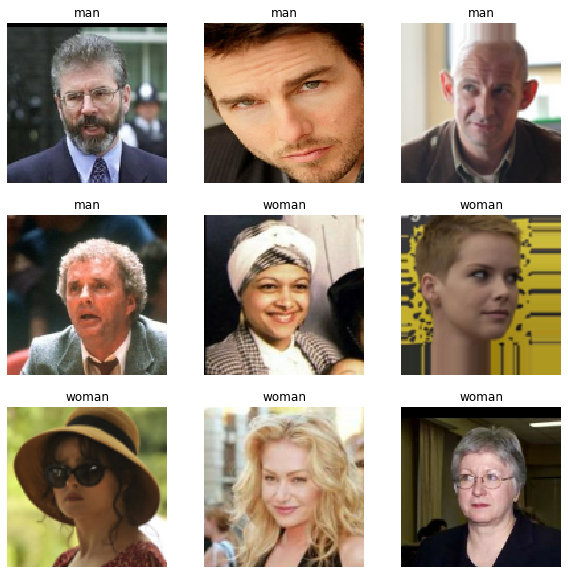

In [6]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
# Build the Model

model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),  
                  layers.Dense(128, activation = 'relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_3.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [8]:
# Train the model

epochs = 100
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = 32, 
                    verbose = 2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
637/637 - 18s - loss: 0.5163 - accuracy: 0.7267 - val_loss: 0.4058 - val_accuracy: 0.8146
Epoch 2/100
637/637 - 13s - loss: 0.3595 - accuracy: 0.8362 - val_loss: 0.3106 - val_accuracy: 0.8629
Epoch 3/100
637/637 - 13s - loss: 0.2624 - accuracy: 0.8899 - val_loss: 0.2181 - val_accuracy: 0.9112
Epoch 4/100
637/637 - 13s - loss: 0.2175 - accuracy: 0.9122 - val_loss: 0.2103 - val_accuracy: 0.9136
Epoch 5/100
637/637 - 13s - loss: 0.1860 - accuracy: 0.9260 - val_loss: 0.2114 - val_accuracy: 0.9192
Epoch 6/100
637/637 - 13s - loss: 0.1640 - accuracy: 0.9376 - val_loss: 0.1793 - val_accuracy: 0.9280
Epoch 7/100
637/637 - 13s - loss: 0.1493 - accuracy: 0.9426 - val_loss: 0.1990 - val_accuracy: 0.9243
Epoch 8/100
637/637 - 13s - loss: 0.1391 - accuracy: 0.9470 - val_loss: 0.1713 - val_accuracy: 0.9367
Epoch 9/100
637/637 - 13s - loss: 0.1243 - accuracy: 0.9529 - val_loss: 0.1783 - val_accuracy: 0.9324
Epoch 10/100
637/637 - 13s - loss: 0.1157 - accuracy: 0.9567 - val_loss: 0.1716 - 

In [36]:
model1_acc = model.evaluate(val_ds)[1]
model1_acc

27/27 [==============================] - ETA: 15s - loss: 0.1568 - accuracy: 0.933 - ETA: 2s - loss: 0.1414 - accuracy: 0.949 - ETA: 1s - loss: 0.1550 - accuracy: 0.94 - ETA: 1s - loss: 0.1463 - accuracy: 0.94 - ETA: 1s - loss: 0.1520 - accuracy: 0.94 - ETA: 1s - loss: 0.1519 - accuracy: 0.94 - ETA: 1s - loss: 0.1605 - accuracy: 0.94 - ETA: 1s - loss: 0.1692 - accuracy: 0.93 - ETA: 1s - loss: 0.1733 - accuracy: 0.93 - ETA: 1s - loss: 0.1797 - accuracy: 0.93 - ETA: 1s - loss: 0.1816 - accuracy: 0.93 - ETA: 1s - loss: 0.1796 - accuracy: 0.93 - ETA: 1s - loss: 0.1840 - accuracy: 0.93 - ETA: 1s - loss: 0.1821 - accuracy: 0.93 - ETA: 1s - loss: 0.1782 - accuracy: 0.93 - ETA: 0s - loss: 0.1786 - accuracy: 0.93 - ETA: 0s - loss: 0.1799 - accuracy: 0.93 - ETA: 0s - loss: 0.1788 - accuracy: 0.93 - ETA: 0s - loss: 0.1756 - accuracy: 0.93 - ETA: 0s - loss: 0.1740 - accuracy: 0.93 - ETA: 0s - loss: 0.1741 - accuracy: 0.93 - ETA: 0s - loss: 0.1772 - accuracy: 0.93 - ETA: 0s - loss: 0.1760 - accurac

0.9347665905952454

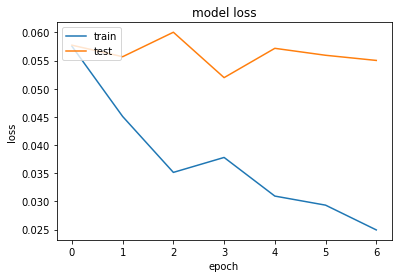

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

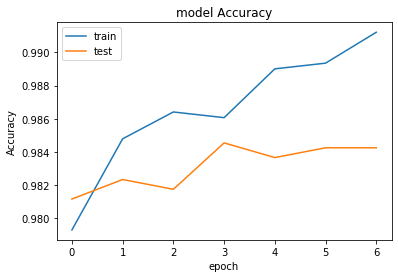

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
# Save the Model

model.save('Gender Model/')

INFO:tensorflow:Assets written to: Gender Model/assets


In [11]:
#Load the Model

model = keras.models.load_model('Gender Model/')

In [39]:
# Load and Predict an image

img = image.load_img("Emotions Test Set/49.png", target_size=(121,121))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(class_names[np.where(classes > 0.5, 1,0)[0][1]])

woman


In [21]:
cap = cv2.VideoCapture(0)

if (cap.isOpened() == False): 
    print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

#out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
 
while(True):
    ret, frame = cap.read()

    if ret == True: 
        #out.write(frame)
        cv2.imshow('frame',frame)
        resized = cv2.resize(frame, (180,180))
        x = image.img_to_array(resized)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images)
        print(class_names[np.where(classes > 0.5, 1,0)[0][1]])
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break 

cap.release()
#out.release()
 
# Closes all the frames
cv2.destroyAllWindows()

man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
